
PROJECT: Trying to find if a patient is diabetic or not.
Dataset used:-https://drive.google.com/file/d/1UqqhtYOaKwnE4dChiq0FKAhMceqbCZM2/view?usp=sharing 

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# df = pd.read_csv("diabetes.csv") #reading the csv file, use this if you are uploding the dataset
from google.colab import drive #usinf drive for easy acess to file

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/gdrive/My Drive/diabetes.csv')

In [ ]:
df.head() #printing the csv file

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns #prints the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df[df['Outcome'] == 1] #creates dataframe with all outcomes equals one

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
len(df.columns[:-1]) #all columns minus the last one

8

In [ ]:
len(df[df["Outcome"]==1]),len(df[df["Outcome"]==0]) #positive vs negative

(268, 500)

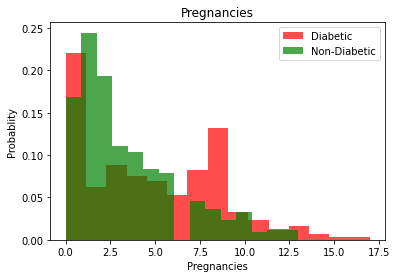

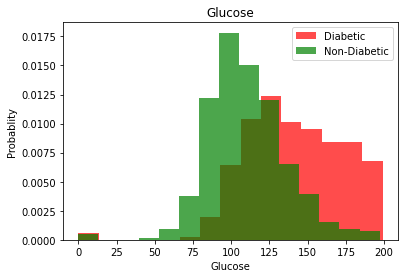

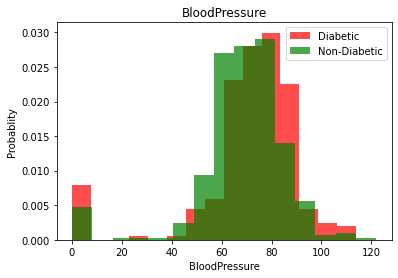

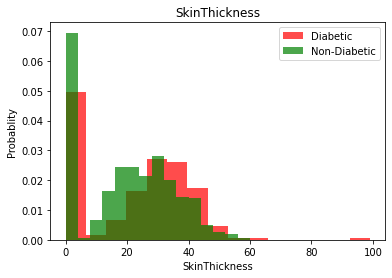

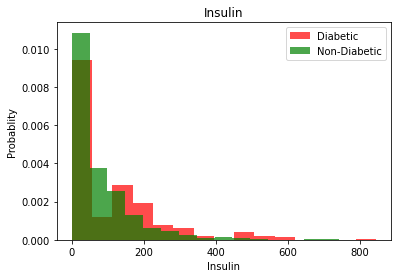

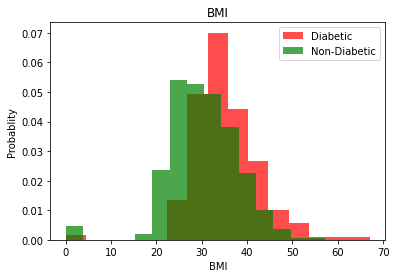

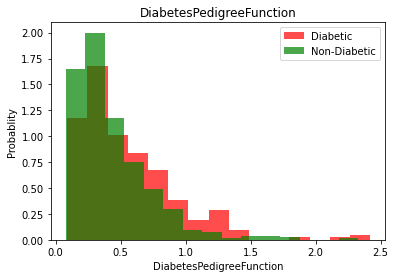

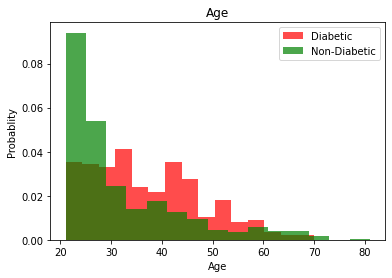

In [ ]:
#making histograms so that we can find the realtionship between diabetes and other body measures
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome'] == 1][label], color='red',label ="Diabetic",alpha=0.7,density=True, bins=15)
  plt.hist(df[df['Outcome'] == 0][label], color='green', label = "Non-Diabetic",alpha=0.7,density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()
  #basically we are trying to visualize the data (diabetic vs varaibles)

In [ ]:
X = df[df.columns[:-1]].values #gives us a numpy array
Y = df[df.columns[-1]].values #array containing data about diabtetic or not

In [ ]:
#scaling the data so that we can get better results during traning
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns )

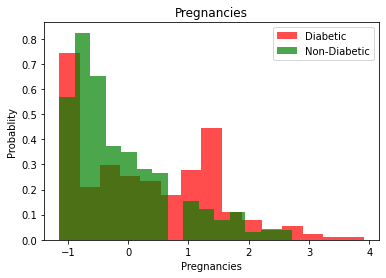

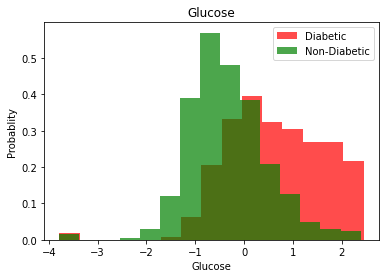

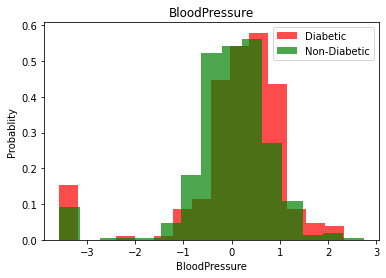

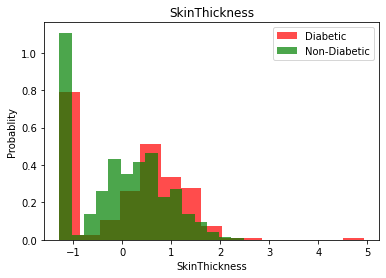

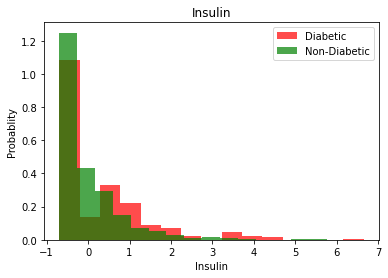

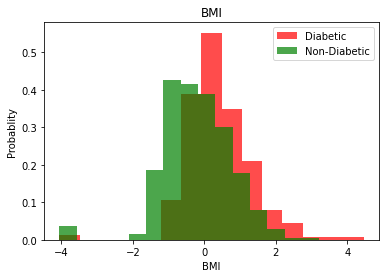

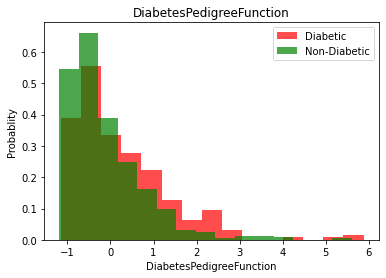

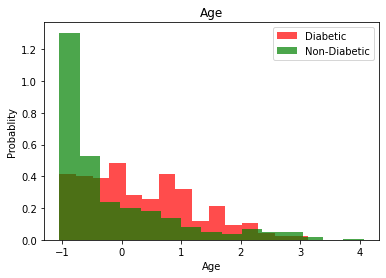

In [ ]:
#visualizing the scaled data
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome'] == 1][label], color='red',label ="Diabetic",alpha=0.7,density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome'] == 0][label], color='green', label = "Non-Diabetic",alpha=0.7,density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(268, 500)

we can see that the number of diabetic vs non-diabetic is twice the size. This also might lead to not traning the NN well and thats why we can try to make both inputs equal

In [ ]:
#making the inputs equal in number 
over = RandomOverSampler()
X, Y = over.fit_resample(X,Y)
data = np.hstack((X, np.reshape(Y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns )

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y, test_size = 0.4, random_state=0) #test_size defines the amount of data we are using to train the model which is 0.4. 
#random_state spilts the data from same place 
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp,Y_temp, test_size = 0.5, random_state=0)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),  #compiling the model by using common optimizer Adam and chosing the learning rate and loss function 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(X_train,Y_train) #trying to evaluate how our model is working as of noe

19/19 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.4150


[0.7235147356987, 0.41499999165534973]

In [ ]:
model.evaluate(X_valid,Y_valid) #evaluating with validation data

7/7 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.4400


[0.7292875647544861, 0.4399999976158142]

In [ ]:
model.fit(X_train,Y_train, batch_size=700,epochs=100,validation_data=(X_valid,Y_valid))

Epoch 1/100
1/1 [==============================] - 1s 930ms/step - loss: 0.7725 - accuracy: 0.4750 - val_loss: 0.7114 - val_accuracy: 0.5050
Epoch 2/100
1/1 [==============================] - 0s 47ms/step - loss: 0.7139 - accuracy: 0.5083 - val_loss: 0.6798 - val_accuracy: 0.5450
Epoch 3/100
1/1 [==============================] - 0s 51ms/step - loss: 0.6755 - accuracy: 0.5583 - val_loss: 0.6599 - val_accuracy: 0.6350
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6505 - accuracy: 0.6567 - val_loss: 0.6470 - val_accuracy: 0.6550
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6347 - accuracy: 0.6550 - val_loss: 0.6373 - val_accuracy: 0.6550
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 0.6238 - accuracy: 0.6733 - val_loss: 0.6270 - val_accuracy: 0.6800
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6135 - accuracy: 0.6700 - val_loss: 0.6153 - val_accuracy: 0.6850
Epoch 8/100
1/1 [==

Because our dataset has entries which have a very varying scale (for ex diabetes_pedegree function is from 0 to 2.5 while glucose ranges from 0 to 200. Now we have to scale them down so that we can train our model better.We will import a package that lets us scale )

scaling is done in upper levels

In [ ]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7850


[0.4720608592033386, 0.7850000262260437]

Testing the accuracy with different batch size and epoches.
1. batch_size=16,epochs=20
   loss: 0.0184 - accuracy: 0.9967 - val_loss: 2.3206 - val_accuracy: 0.7800
   loss: 2.1353 - accuracy: 0.7600 //testing

2. batch_size=16,epochs=100
   loss: 0.0154 - accuracy: 0.9967 - val_loss: 2.5880 - val_accuracy: 0.7800
   loss: 2.3460 - accuracy: 0.7550//testing

3. batch_size=10,epochs=100
   loss: 0.0620 - accuracy: 0.9817 - val_loss: 3.4703 - val_accuracy: 0.7700
   loss: 2.7822 - accuracy: 0.7550//testing

4.  batch_size=700,epochs=100
    loss: 0.3601 - accuracy: 0.8417 - val_loss: 0.4293 - val_accuracy: 0.7750
    loss: 0.4721 - accuracy: 0.7850 //testing

Accuracy has increased with increase in number of batch_size and epoches.